In [4]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [9]:
df=pd.read_csv("spam.csv",encoding="latin-1")

In [10]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1, inplace=True)

In [12]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [56]:
df.shape

(5572, 3)

In [13]:
df.columns=["Class","Text"] #sütun isimlerini değiştirdik

In [14]:
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df["Label"]=df["Class"].map({"ham":0,"spam":1})  #label alanında ham varsa 0 spam varsa 1 yazdırdık

In [16]:
df.head()

,Class,Text,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


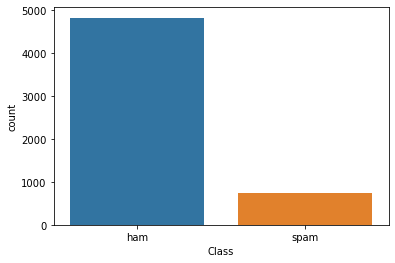

In [18]:
sns.countplot(x=df["Class"]);

In [23]:
df["Text"]=df["Text"].str.lower() #küçük harfe çevirdik
df['Text']=df['Text'].str.replace('[^\w\s]','') #noktalama işaretlerini kaldırdık
df['Text']=df['Text'].str.replace('\d+','') #rakamları kaldırdık
df['Text']=df['Text'].str.replace('\n','').replace('\r','') #boşlukları kaldırdık


In [57]:
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [75]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("masked.png"))
    wc=WordCloud(background_color=bgcolor, stopwords=STOPWORDS,mask=mask)
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off") #x ve y eksenini gösterir

In [76]:
ham=df[df["Class"]=="ham"]["Text"]

In [77]:
spam=df[df["Class"]=="spam"]["Text"]

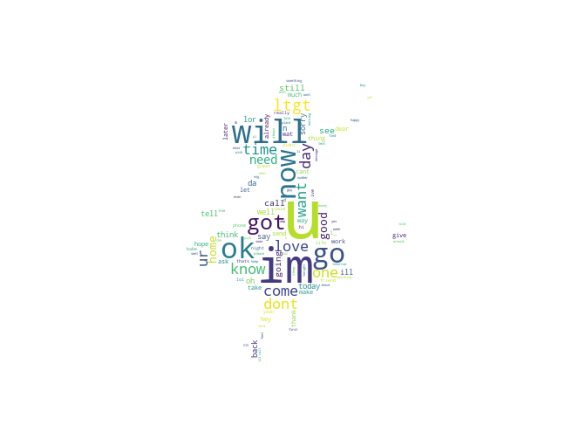

In [78]:
wc(ham,"white") #Kabul edilen mesajlar

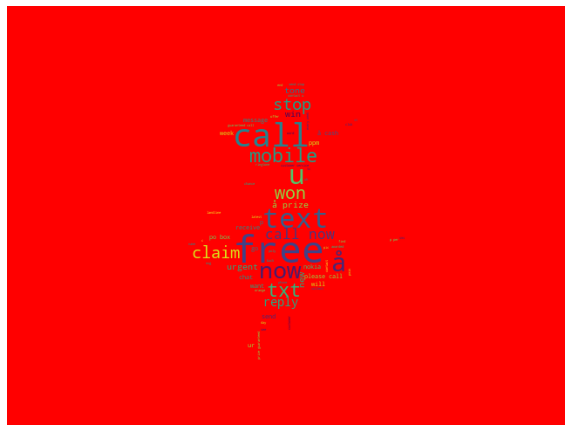

In [79]:
wc(spam,"red") #Spam mesajları

In [40]:
x=df["Text"]
y=df["Label"]

In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [42]:
vect=CountVectorizer(stop_words="english")

In [43]:
x=vect.fit_transform(x)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [46]:
mb=MultinomialNB()

In [47]:
tahmin=mb.fit(x_train,y_train).predict(x_test)

In [48]:
accuracy_score(tahmin,y_test)  #%97 oranında spam ve normal mesaj olmayı tahmin edebiliyoruz

0.9712849964106246

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
d=DecisionTreeClassifier()

In [51]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
tahmin2=d.predict(x_test)

In [55]:
accuracy_score(tahmin2,y_test)

0.9612347451543432